###### Mechanics Lab 6 -- Driven damped harmonic oscillator and resonance

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In this lab you will build on the work you did in the previous week to model damped harmonic motion. Specifically, you will add in a sinusoidal forcing term in order to measure the the resonant response at different driving frequencies.

## Objectives

In this lab you will learn about 
* the long term and transient motion of driven damped harmonic oscillators;
* the phase-shift between the oscillator and the driver;
* and the amplitude of the resulting motion due to different driving frequencies;
* the effect of damping on the resonance curve.


## Motion of a driven damped harmonic oscillator

#### Exercise 6.1
You will be modifying your code from last week. Therefore, start by copying and pasting your code to model a damped harmonic oscillator into the cell below. Make sure it runs as you would expect.

*Hint:* you'll probably find most of the code you need in your response to exercise 5.6. However, you may still need to define some constants of the system (like $m$, $\omega_0$). Also, don't forget that in order to use the odeint differential equation solver you'll need to include the following line:

    from scipy.integrate import odeint

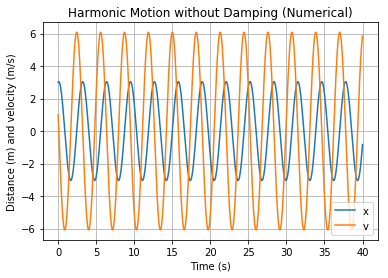

In [7]:
# <Exercise 6.1 Numerical solution to SHO with damping and later driving>
# <Exercise 5.6 No damping> 
from scipy.integrate import odeint
#### Edit the code below
# <Exercise 5.1 Analytical solution, no damping>
x0 = 3
v0 = 1
k = 8
m = 2
w = np.sqrt(k/m)
tpoints = np.linspace(0,10,10000) 

def deriv(r,t,param): 
    #unpack the parameters (in this case, just the damping parameter)
    beta_damp_deriv = param[0]
    #unpack the variables
    x = r[0]
    v = r[1]
    #perform the derivatives
    dxdt = v  #fix
    dvdt = -w0**2 * x - (2*beta_damp_deriv)*v  #fix
    return array([dxdt,dvdt],float)

t = np.linspace(0.0,40,10000) #fix 
beta_damp = 0.0 # The damping parameter. In later exercises, you will change this value
param = np.array([beta_damp]) # Same the damping parameter into the param array so that it can be passed to the deriv 
rinit = np.array([x0,v0])                             # function through odeint
r=odeint(deriv,rinit,t, rtol=1.0e-11,atol=1.0e-11,args=(param,)) # Including the param array in the arguments we pass
                                                                # to odeint

#### CODE TO PLOT x(t) AND v(t) HERE
figure()
plot(t,r[:,0],label='x')
plot(t,r[:,1],label='v')
grid()
legend()
title('Harmonic Motion without Damping (Numerical)')
xlabel('Time (s)')
ylabel('Distance (m) and velocity (m/s)')
show()
#### CODE TO SAVE SOLUTION HERE
        
undamped_xsolution = r[:,0] #saving the undamped solution


#### Exercise 6.2
Modify your code above (damped harmonic oscillator) to include a driving term of the form $F_{0}$cos($\omega t$), where $\omega$ is the driver frequency. Make the drive frequency, $\omega$, a parameter in your deriv function, similarly to how the damping term was incorporated in the previous lab. To do this, you'll have to save both $\beta$ and $\omega$ into your parameter array before calling odeint like so:
    
    param = np.array([beta_damp, omega])
    
You'll also have to unpack your param array within the deriv function along the lines of this:

    beta_damp_deriv = param[0]
    omega_derv = param[1]
    

Start your system with $x = 0$, $v = 0$, and $\omega = \omega_{0}$ (the natural frequency of the driver).  Let m = 2, k = 8, $\beta$ = 0.1, and the size of the driver force, $F_{0}$, equal 0.2.

Run your integrator for 60 seconds (recalling that $\beta$ = 0.1 corresponds to $\tau$ = 10 seconds, so we'll see the long-term behavior by going out beyond 5$\tau$, where more than 99% of the transient term has died away).

Graph x(t) and overlay a copy of the driver, via a

    plot(t, F0*cos(omega*t)) 

You should find that the amplitude of the long-term motion is about 0.25 m.

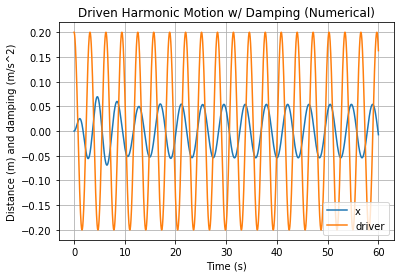

In [42]:
# <Exercise 6.2 Numerical solution to SHO with damping and later driving>

# constants
x0 = 0
v0 = 0
m = 2
k = 8
F0 = 0.2
w = np.sqrt(k/m)
wdrive = 0.75*w
beta_damp = 0.2 # The damping parameter

# define the derivative function
def deriv(r,t,param): 
    #unpack the parameters (in this case, just the damping parameter)
    beta_damp_deriv = param[0]
    omega_deriv = param[1]
    #unpack the variables
    x = r[0]
    v = r[1]
    #perform the derivatives
    dxdt = v  #fix
    dvdt = -w0**2 * x - (2*beta_damp_deriv)*v + F0*cos(wdrive*t)/m  #fix
    return array([dxdt,dvdt],float)

t = np.linspace(0.0,60,10000) #fix 
param = np.array([beta_damp, w]) # Same the damping parameter into the param array so that it can be passed to the deriv 
rinit = np.array([x0,v0])                             # function through odeint
r=odeint(deriv,rinit,t, rtol=1.0e-11,atol=1.0e-11,args=(param,)) # Including the param array in the arguments we pass
                                                                # to odeint

# plot
figure()
plot(t,r[:,0],label='x')
plot(t, F0*cos(w*t),label='driver')# driver
# plot(t,r[:,1],label='v')
grid()
legend()
title('Driven Harmonic Motion w/ Damping (Numerical)')
xlabel('Time (s)')
ylabel('Distance (m) and damping (m/s^2)')
show()

#### Exercise 6.3

Answer the following questions about the motion of the damped driven oscillator ***here***.

* What happens to the long-term and short-term motion if you change the initial position, $x$, and/or initial velocity, $v$?

    It should trend to the behavior of the driving force in the long-term. Initially, the motion would be a mix of the frequency of the driving force and the natural frequency of the oscillator.


* Looking at your figure, what do you observe about the relationship between the driver waveform and the position waveform?  (We call this the *relative phase* of the motion with respect to the driver.)

    They have the same period. This makes sense, since the frequency of the driving force is the same as the natural frequency of the oscillator.


* If you change the frequency to be 0.75 $\omega_{0}$, what  happens to the relative phase?  What happens to the long-term amplitude of the motion?
    
    The long-term amplitude appears to have dropped to around 0.05. The relative phases are not in sync. The period of the oscillator is now longer than the driver. 


* If you change the frequency to 1.25 $\omega_{0}$, what  happens to the relative phase?  What happens to the long-term amplitude?

    While the oscillator initially misbehaves, it is made to conform with the driver by the end of the time interval. The relative phase of the oscillator appears to exceed that of the driving force.

## Amplitude of driven damped oscillations at resonance

### Maximum steady-state amplitude, determined analytically

You should have found that this driven oscillator reaches a steady-state amplitude that is largest when driven at its natural frequency $\omega = \omega_{0}.$  We call this the *resonance frequency*.  Let's find out how large this amplitude becomes (you can find a version of the following derivation is section 5.5 of your textbook).

Your equation of motion is
$$x'' + 2 \beta x' +\omega_{0}^2 x = \frac{F_{0}}{m} cos(\omega t).$$
We look for solutions that have the same time frequency as the driver (because if the solutions were at some other frequency, there's no way we could balance this equation).  So let's assume $x(t) = Ae^{i\omega t}$, with $A$ a real constant.  With no loss in generality, we can consider the driver to look like $F_{0}e^{i\omega t}$.

Then the equation of motion is $$(-\omega^2 A + 2 i\beta \omega A +\omega_{0}^2 A) e^{i \omega t} = \frac{F_{0}}{m} e^{i\omega t},$$
or $$ (\omega_{0}^2-\omega^2  + 2 i\beta \omega) A = \frac{F_{0}}{m}$$

At resonance ($\omega = \omega_{0}$), considering only the amplitudes of the real and imaginary parts, we see that $$ 2\beta \omega A= \frac{F_{0}}{m}.$$  So we expect in the steady state that the amplitude 
$$A = \frac{F_{0}}{2 \beta m \omega}. $$

Alternatively, we could note that when the driving force matches the damping force (i.e. $F_{0} = bv),$ we must be in equilibrium, where the average work done by the driver exactly matches the average energy loss due to the damping force.  Recalling that $\lvert 2\beta x'\rvert = b(\omega A)/m = F_{0}/m,$ we get $A = F_{0}/(b \omega) = \frac{F_{0}}{2 \beta m \omega}.$

#### Exercise 6.4

Compare your numerical result at resonance ($\omega = \omega_{0}$) with the predicted steady-state amplitude for the system described in exercise 5.2.  Then see what happens if you 1) triple the force term, or 2) double the damping parameter. Include your analysis ***here***.

We calculated $$A=\frac{F_0}{b\omega}=\frac{0.5}{\omega}=0.25$$

Which is exactly what is observed on the graph for 5.2.

1) If we triple the force term, the amplitude of the graph increases significantly to 7.5, which (conveniently) is three times the calculated amplitude for the original force term.

2) If we double the damping parameter, it decreases the amplitude by a factor of 2. This is because despite the efforts of the driving force, the max amplitude is nonetheless limited because of the stronger damping force.

#### Exercise 6.5 

Change your driver frequency to 1.08$\omega_0$ and answer the following questions ***here***.

* Approximately at what time does the oscillator amplitude hit its peak value?

At about 12 seconds.
        
* If you want the steady-state value of the oscillator amplitude, when should you start looking at it?

The oscillator's amplitude appears to stabilize at around t=30s.
        
* What's the value of e^(-5)?

According to Google's version of math, = 0.00673794699.
        
* Why should we wait at least 50 seconds in this example?

Because thats when our oscillator gets back into phase with the driver.

## Phase of driven damped oscillations

### Relative phase of x(t) and f(t), determined analytically
What's with the phase of the oscillations?  The easy way to see the relative phase of the x(t) solution above and below resonance is to ignore damping altogether (or make sure we are very far from resonance).

Let's ignore damping for a moment, and look at the driven oscillator equation of motion:
$ (\omega_{0}^2-\omega^2) A(\omega) = \frac{F_{0}}{m}$, where $A(\omega)$ represents the steady-state amplitude of the oscillation for a given driver frequency $\omega$.  Solving for $A(\omega) = \frac{F_{0} /m}{(\omega_{0}^2-\omega^2)}$ shows that 
if $\omega < \omega_{0},$ the amplitude has the same sign as $F_{0}$, and so the motion of the mass is *in phase* with the driver.  If $\omega > \omega_{0},$ then the amplitude has the opposite sign as $F_{0}$, and so the motion is *out of phase* with the driver.  

#### Exercise 6.6
Check the relative phases of x(t) and f(t) for your $\omega = 0.75 \omega_{0}$ and $\omega = 1.25 \omega_{0}$ curves. Explain ***here*** whether your curves match the above prediction.

For the first case $\omega=0.75\omega_{0}$, we found that $$A(\omega)=\frac{\frac{F_0}{m}}{(\omega_0)^2-0.5625(\omega_0)^2}=\frac{\frac{0.2}{2}}{4-0.5625*4}=0.057143$$
Which has the same sign as $F_0$, and as such is *in phase* with the driver. 

For the second case $\omega=1.25\omega_{0}$, we found that $$A(\omega)=\frac{\frac{F_0}{m}}{(\omega_0)^2-0.5625(\omega_0)^2}=\frac{\frac{0.2}{2}}{4-1.5625*4}=-0.044444$$
Which has a different sign from $F_0$, and as such is *out of phase* with the driver. 

So: below resonance the mass is in phase with the driver, and above resonance the mass is out of phase with the driver.  At resonance, what happens? 

That question is hard to answer in the absence of damping, because the amplitude goes to $\infty$. But you can make a pretty bold guess that it lies between $0^{\circ}$ and $180^{\circ}$ relative phase.  Does your numerical solution for $\omega = \omega_0$ provide a clue? Explain ***here***.

When we set $\omega=\omega_0$, we find that the phase is shifted by $\pi/2$ radians.

```


```

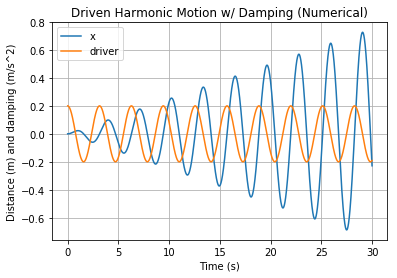

In [41]:
# <Exercise 6.2 Numerical solution to SHO with damping and later driving>

# constants
x0 = 0
v0 = 0
m = 2
k = 8
F0 = 0.2
w = np.sqrt(k/m)
wdrive = w
beta_damp = 0.0 # The damping parameter

# define the derivative function
def deriv(r,t,param): 
    #unpack the parameters (in this case, just the damping parameter)
    beta_damp_deriv = param[0]
    omega_deriv = param[1]
    #unpack the variables
    x = r[0]
    v = r[1]
    #perform the derivatives
    dxdt = v  #fix
    dvdt = -w0**2 * x - (2*beta_damp_deriv)*v + F0*cos(wdrive*t)/m  #fix
    return array([dxdt,dvdt],float)

t = np.linspace(0.0,30,10000) #fix 
param = np.array([beta_damp, w]) # Same the damping parameter into the param array so that it can be passed to the deriv 
rinit = np.array([x0,v0])                             # function through odeint
r=odeint(deriv,rinit,t, rtol=1.0e-11,atol=1.0e-11,args=(param,)) # Including the param array in the arguments we pass
                                                                # to odeint

# plot
figure()
plot(t,r[:,0],label='x')
plot(t, F0*cos(w*t),label='driver')# driver
# plot(t,r[:,1],label='v')
grid()
legend()
title('Driven Harmonic Motion w/ Damping (Numerical)')
xlabel('Time (s)')
ylabel('Distance (m) and damping (m/s^2)')
show()

## The phase dependence $\delta(\omega)$ (Complex plane to the rescue)

By including damping in our equation of motion, we can come up with an expression for the difference in phase between x(t) and f(t), which we will call $\delta(\omega)$. The derivation follows (and can also be found in section 5.5 of your textbook).

Starting with our general equation of motion

$$ (\omega_{0}^2-\omega^2  + 2 i\beta \omega) A = \frac{F_{0}}{m}$$
and solving for $A(\omega)$ yields:

$$  A(\omega) = \frac{\frac{F_{0}}{m}}{(\omega_{0}^2-\omega^2  + 2 i\beta \omega)}.$$

This amplitude can be represented as a vector in the complex plane, with a real part along the x-axis and an imaginary part along the y-axis.  The magnitude of the vector is given by $A\cdot A^*$, and the angle between the x axis and the $A$ vector can be found from 

$$tan(\delta) = \frac{Im(A)}{Re(A)} = -\frac{2\beta\omega}{(\omega_{0}^2-\omega^2)}$$

It's traditional to multiply the right side by -1, and then interpret this quantity as the tangent of the phase *lag* of the oscillator with respect to the driver.

$$tan(\delta) = \frac{Im(A)}{Re(A)} = \frac{2\beta\omega}{(\omega_{0}^2-\omega^2)}$$

#### Exercise 6.7. 
Plot this analytically-derived phase lag $\delta$ as a function of frequency. Assume our usual $\omega_{0} = 2, \beta = 0.1.$  Look over a range $\omega = [0,2\omega_{0}]$.  You'll need a lot of points to make this a symmetrical plot.



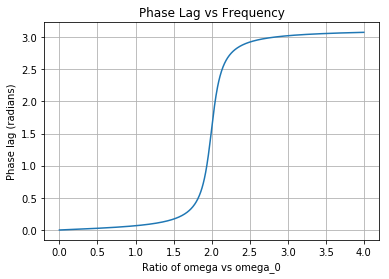

In [82]:
# <Exercise 6.7 Plot of the phase lag as a function of frequency near resonance>
w0=2
beta_damp=0.1
w=linspace(0.0,2*w0,1000)
deltas=zeros(1000)

i = 0
for omega in w:
    deltas[i] = math.atan2((2*beta_damp*omega),(w0**2-omega**2))
    i += 1

# d=np.a

figure()
plot(w, deltas)
title("Phase Lag vs Frequency")
xlabel("Ratio of omega vs omega_0")
ylabel("Phase lag (radians)")
grid()
show()

That plot of phase lag vs. frequency looks a bit funky because we'd like the angle to lie in the range [0,$\pi$], rather than [-$\pi$/2, $\pi$/2].  We need to fix our plot to make it look like Taylor's Fig. 5.19, p. 192.

Here's a fix that maps the result of the arctan onto [0,$\pi$].  Recall the find() function, which we can use to find where $\phi$ is negative:  

    neg_delta_indices = find(delta<0). 

Now simply add $\pi$ to those angles:

    delta[neg_delta_indices]+=pi


#### Exercise 6.8
Replot $\phi$ vs. $\omega$ and answer the following questions ***here***:  
* What's the phase lag when the oscillator is driven at resonance?

at resonance the phase lag is $\pi/2$.

* What's the phase lag well below resonance?

Well below resonance, the phase lag is very low.

* What's the phase lag well above resonance?

Well above resonance, the phase lag approaches $\pi$.

```



```

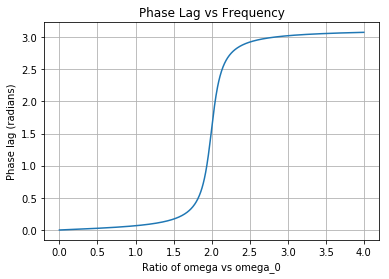

In [89]:
# <Exercise 6.8 Plot of phase lag, plotted [0,$\pi$] >

w0=2
beta_damp=0.1
w=linspace(0.0,2*w0,1000)
deltas=zeros(1000)

i = 0
for omega in w:
    deltas[i] = math.atan2((2*beta_damp*omega),(w0**2-omega**2))
    i += 1

# d=np.a

figure()
plot(w, deltas)
title("Phase Lag vs Frequency")
xlabel("Ratio of omega vs omega_0")
ylabel("Phase lag (radians)")
grid()
show()

## Amplitude as a function of driver frequency, $\lvert A(\omega)\rvert$

### Analytical solution to the amplitude of a damped, driven harmonic oscillator
We solved for the steady state solutions analytically, but it's a little inconvenient to plot the complex amplitude:

$$  A(\omega) = \frac{\frac{F_{0}}{m}}{(\omega_{0}^2-\omega^2  + 2 i\beta \omega)}.$$

Instead, multiply by the complex conjugate and then take the square root to get the magnitude:


$$ \lvert A(\omega)\rvert = \frac{\frac{F_{0}}{m}}{\sqrt{(\omega_{0}^2-\omega^2)^2  + (2 \beta \omega)^2}}.$$

####  Exercise 6.9
Plot this analytic expression for amplitude as a function of $\omega$ to observe the resonance.  (This is probably most neatly done by creating a vector of frequencies over which you want to plot, then making an analytical function that gets evaluated at these frequencies.  Pay particular attention to all the squares and square roots.)  If you want to compare your curve with Taylor's Figure 5.17 on p. 190, you'll need to square the result before plotting.

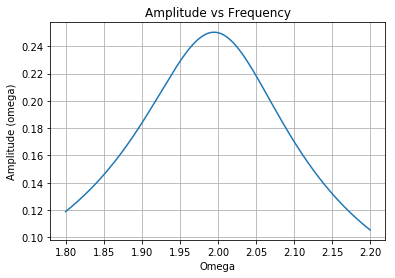

In [87]:
# <Exercise 6.9 Analytical plot of amplitude vs. frequency >

#Outline in which to make a resonance curve from analytical expression.  
# Save a copy (here called model) for later

# redefine w


omega_range = np.linspace(0.90*w0,1.10*w0,201)  #201 points is nice


def xanalytical(w, F0, m, w0, beta_damp):

    a_of_omega = (F0/m)/sqrt((((w0**2-w**2)**2)+(2*beta_damp*w)**2)) #fix this expression
    return a_of_omega


model = np.array(xanalytical(omega_range,F0,m,w0,beta_damp))

# make a plot
figure()
plot(omega_range, model)
title("Amplitude vs Frequency")
xlabel("Omega")
ylabel("Amplitude (omega)")
grid()
show()

## Creating a numerical resonance curve by plotting the maximum amplitude$ \lvert A \rvert $vs. frequency

Big picture:  we want to numerically replicate the resonance curve you just plotted analytically.  This will provide proof that the analytic expression for the amplitude of a driven damped harmonic oscillator is correct. To do this, you'll run your integrator 201 times over the omega_range defined above.  At each $\omega$ step you'll need to run the integrator out until the amplitude reaches a steady state.  Find and store this final maximum amplitude each time.  Remember, all we save from each run is the maximum steady-state amplitude.  You should end up with a vector of 201 points, each of which represents the steady-state amplitude A($\omega$). 

#### Exercise 6.10
Create a loop in order to find max amplitude vs. frequency and examine the resonance.

Use these parameters: m = 2, k = 8, $\beta$ = 0.1, $F_{0}$ = 0.2.  You may recall from Lab 2 how we made an empty list, then appended solutions to it. In this case you'll be making an empty list of solutions, stepping through various frequencies (say, from 0.9 $\omega_{0}$ to 1.1 $\omega_{0}$). Now extract the highest features after the integration has run for a long time (say, after t has encompassed at least 5 time constants). That means you need to go at least $\frac{5}{\beta}$ before you look for the steady-state amplitude. Which means you need to run your integration for at least 50 seconds, after all the transient behavior has died away, but then let it run sufficient extra time to capture the steady-state motion.  Hence 60 seconds is about right.  Recall from Lab 1 how to use argmax() to find the index of the maximum value in an array.  Here's an illustration of how you might find the largest value in the **second half** of a list.


In [88]:
#Here's a list to illustrate how to find the largest element in the second half of the list:
a=[0,1,20,3,4,3,6,4]
print("The list is:  ",a)
maxa=argmax(a)
print ("The index of the largest item in the list:",maxa) #the index of the maximum value in the list
print("The value of the largest item in the list: ",a[maxa]) #the value of the maximum value in the list
half_length = len(a)//2  ## the double // slash indicates an integer division, which truncates the result
maxb = argmax(a[half_length:]) #restrict the search to the second half of the list
                           
print("The relative index of the largest item in the 2nd half:  ", maxb)# the relative index of the second half
print("The largest element in the second half of the list:  ",a[half_length+maxb]) #note carefully this construction:
#You need to add the half_length to maxb to get the correct position in the a array.

The list is:   [0, 1, 20, 3, 4, 3, 6, 4]
The index of the largest item in the list: 2
The value of the largest item in the list:  20
The relative index of the largest item in the 2nd half:   2
The largest element in the second half of the list:   6


In [91]:
#  A handy thing to know:  if you want to print the current value of omega, without filling up the screen,
# you can modify the print command to give a couple of spaces as separator (this suppresses the new line).
from time import sleep
omega_range = linspace(0.9*omega0, 1.1*omega0,201)
for omega in omega_range:
    sleep(0.01)
    print (omega, end=" ")  # Keep track of current omega, so you know you're not stuck
                            # The end=" " avoids a newline at the end

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

In [98]:
# Exercise 6.10 Map out the resonance from 0.9 omega0 to 1.1 omega0 for beta = 0.1
wpts = linspace(0.9*w0,1.1*w0, 201)
apts = []

for w in wpts:
    a_of_omega = (F0/m)/sqrt((((w0**2-w**2)**2)+(2*beta_damp*w)**2)) #fix this expression
    apts.append(a_of_omega)
    sleep(0.01)
    
# find our max amplitude
maxa=apts[argmax(apts)]
print("The max amplitude for the oscillation is: ",maxa) #the value of the maximum value in the list

The max amplitude for the oscillation is:  0.2503007658788566


### How are the widths of the peaks and their heights related, for small damping?

Note that the height of each peak falls a factor of 2 for each factor of 2 increase in the damping.  What does the width of each peak do? 

The easy way to answer this question is to look at the amplitude squared:

$$ A^2(\omega) = \frac{\big(\frac{F_{0}}{m}\big)^2}{(\omega_{0}^2-\omega^2)^2  + (2 \beta \omega)^2}.$$

At resonance the denominator becomes $\big(2 \beta \omega\big)^2, $ and $A^2$ is at its peak value.  $A^2$ reaches half of that peak value when $\omega$ is such that
$$\big(\omega_{0}^2-\omega^2)^2  = (2 \beta \omega)^2,$$ i.e. the two terms in the denominator are equal.


#### Exercise 611 
On a separate piece of paper, work through the following derivation for width of the resonant curve.

Let's look very close to the resonance, by defining a new frequency $\Delta \equiv \omega - \omega_{0},$ so we can write $\omega = \Delta+\omega_{0}.$ 

First, take the square root of each side, so
$$ \big(\omega_{0}^2-\omega^2) = \pm2 \beta\omega$$

*Substitute* for $\omega$ and *expand* the square.  Then look at your result:  anything multiplied by $\omega_{0}$ is much larger than a term like $\beta\Delta.$  Simplify, and show that:
**$$\Delta \approx  \pm \beta.$$**

### Now for the geometric interpretation:  

The maximum $A^2$ grows inversely with $\beta$, whereas the width of the peak grows proportionally to $\beta.$

***If you were to plot $A^2$ vs. $\omega$, for differing $\beta$, what quantity stays approximately the same?***

The index of the maximum stays the same.


The **Q** of a damped driven oscillator is a figure of merit (*quality factor*) defined as

$$Q = \frac{\omega_{0}}{2\beta} = \frac{\omega_{0}}{2\Delta}.$$ 

Q can be thought of as an *amplification factor*, whereby small motions in the driver get turned into large excursions of the mass at resonance. For example, at resonance in the steady state, the driver supplies a force of magnitude $F_{0} = -k x_{0} = -m\omega_{0}^2x_{0},$ so $\lvert A(\omega =\omega_{0})\rvert = \frac{\omega_{0}}{2 \beta}x_{0}= Qx_{0}.$  Therefore, the greater the value of Q, the greater the amplitude at resonance.

Experimentally, if you plot the amplitude squared vs. $\omega$, the FWHM (full-width-at-half-maximum) of the peak is $2\beta$, and the Q of the resonance is $Q = \frac{\sqrt{A^2}}{FWHM}$. 

#### Exercise 6.12
If you have time, you can see how the resonance curve changes with $\beta$ by attempting the challenge problem below.
For now though, simply recreate your resonance curve from exercise 5.10 for $\beta = 0.05$ and verify by eye that that full-width-at-half-maximum and the peak amplitude change by the amount you would expect. Explain ***here***.

The index of the amplitude is the same, however the actual amplitude increases by a factor of 2. In addition, the full width at half-maximum has shrunk.

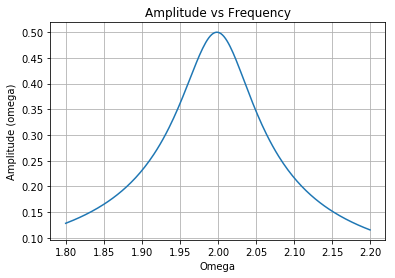

In [101]:
# Exercise 6.10 Map out the resonance from 0.9 omega0 to 1.1 omega0 for beta = 0.1
wpts = linspace(0.9*w0,1.1*w0, 201)
apts = []

beta_damp = 0.05

for w in wpts:
    a_of_omega = (F0/m)/sqrt((((w0**2-w**2)**2)+(2*beta_damp*w)**2)) #fix this expression
    apts.append(a_of_omega)
    sleep(0.01)
    
# make a plot
figure()
plot(wpts, apts)
title("Amplitude vs Frequency")
xlabel("Omega")
ylabel("Amplitude (omega)")
grid()
show()

## Check-out
#### Exercise 6.13

Briefly summarize in the cell below the ideas in today's lab.

We examined simple harmonic motion without damping initially, and then with a driving force and a damping force. We then looked at resonance and how it plays out. Also, we compared the analytic vs numerical solutions to the resonance curve for the harmonic oscillator. 

## Challenge Problem

Plot on the same scale a series of 5 resonance curves in which you vary $\beta$ from $\beta$=0.01 all the way up to heavy damping (0.16), with a factor of 2 increase in $\beta$ for each curve. Use the usual parameters, with a fixed driver of force amplitude F0 = 0.2, so illustrating the effect of damping on the width of the resonance. 

Rather than manually running your $\lvert A(\omega)\rvert$ solution 5 times separately, make an outer *for* loop that changes $\beta$, and an inner loop that changes $\omega$.  In CS terminology, you'll be making a *nested for loop* structure.  Each time you get a resonance curve, plot it (so the plot command should be placed just outside of the inner omega loop). The easiest way to do the nesting is to copy your working numerical resonance curve from above into a new outer loop that iterates over a $\beta$ list.  Make sure you indent the nested for loops properly; see the illustration in the Python notebook "Nested For Loops Examples"

*Time-saving idea:*  instead of running each simulation on the same t vector, adjust the total time for each integration to be $6\tau$, allowing the transient to die off.  (So you'll be redefining the t-vector within the outer loop, just after you set the latest value of $\beta$.)  Look for the maximum value of $\lvert A(\omega)\rvert$ after 5 $\tau$ has elapsed, i.e. from 5/6 of the way through the x(t) array, all the way to the end. *Then each doubling of $\beta$ ought to run twice as fast! *

Compare the peak values at resonance for different damping parameters to the analytic expression from exercise 5.4. Do your results agree? Explain ***here***.

Compare the widths of the curves to the analytic expression for them from exercise 5.11. Do your results agree? Explain ***here***.
```


```

In [ ]:
# Show a set of damping curves, 2x apart 
%pylab inline

